In [1]:
import numpy as np
from numpy import pi as pi
import matplotlib.pyplot as plt
plt.ion()
import yt
from tools import my_field_def, unit_base, subhalo_center, ray_end_from_sph, make_slice, plot_ray_in_slice, get_2Mpc_LG_dataset, get_mw_center_2Mpc_LG

In [18]:
# snap_file = '../../2Mpc_LG_convert/snapdir_135/snap_LG_WMAP5_2048_135.0'
# snap_num = 135
# subfind_path = '../../2Mpc_LG'


ds = get_2Mpc_LG_dataset()
mw_center = get_mw_center_2Mpc_LG()
mw_center

yt : [INFO     ] 2019-02-02 21:07:57,286 Calculating time from 1.000e+00 to be 4.336e+17 seconds
yt : [INFO     ] 2019-02-02 21:07:57,430 Parameters: current_time              = 4.336488085281229e+17 s
yt : [INFO     ] 2019-02-02 21:07:57,432 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-02-02 21:07:57,434 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-02-02 21:07:57,436 Parameters: domain_right_edge         = [64000. 64000. 64000.]
yt : [INFO     ] 2019-02-02 21:07:57,438 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-02-02 21:07:57,440 Parameters: current_redshift          = 2.220446049250313e-16
yt : [INFO     ] 2019-02-02 21:07:57,441 Parameters: omega_lambda              = 0.721
yt : [INFO     ] 2019-02-02 21:07:57,443 Parameters: omega_matter              = 0.279
yt : [INFO     ] 2019-02-02 21:07:57,445 Parameters: hubble_constant           = 0.7


array([21819.64 , 32715.15 , 32897.707], dtype=float32)

## Slices en el plano YX

yt : [INFO     ] 2019-02-02 21:07:59,286 Allocating for 1.111e+07 particles (index particle type 'all')
yt : [INFO     ] 2019-02-02 21:08:00,896 Identified 7.123e+05 octs
yt : [INFO     ] 2019-02-02 21:08:08,840 xlim = 31715.150391 33715.150391
yt : [INFO     ] 2019-02-02 21:08:09,495 ylim = 31897.707031 33897.707031
yt : [INFO     ] 2019-02-02 21:08:09,512 xlim = 31715.150391 33715.150391
yt : [INFO     ] 2019-02-02 21:08:09,516 ylim = 31897.707031 33897.707031
yt : [INFO     ] 2019-02-02 21:08:09,519 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



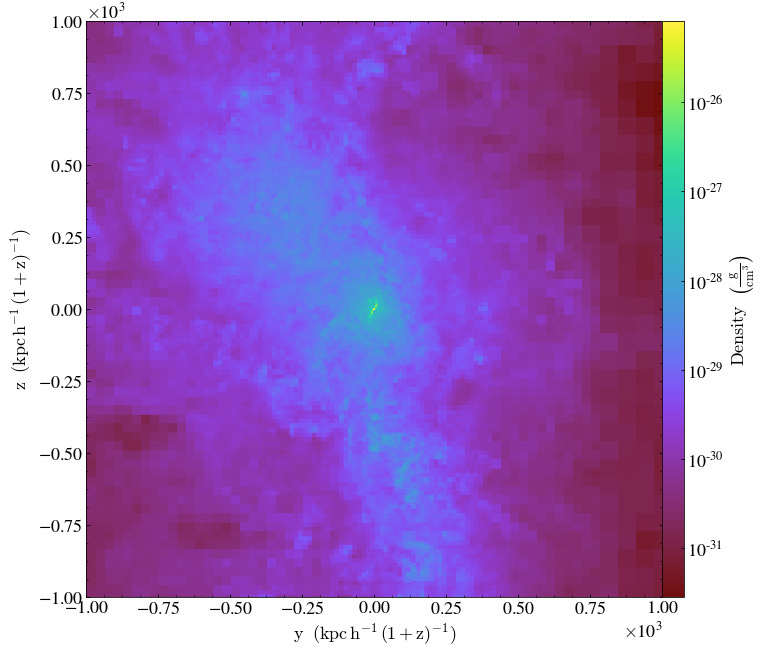

In [19]:
slc = make_slice(ds, mw_center, 2000, 'x')
slc.show()

yt : [INFO     ] 2019-02-02 21:08:14,428 Parameters: current_time              = 4.336488085281229e+17 s
yt : [INFO     ] 2019-02-02 21:08:14,429 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-02-02 21:08:14,429 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2019-02-02 21:08:14,430 Parameters: domain_right_edge         = [64000. 64000. 64000.] code_length
yt : [INFO     ] 2019-02-02 21:08:14,430 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-02-02 21:08:14,431 Parameters: current_redshift          = 2.220446049250313e-16
yt : [INFO     ] 2019-02-02 21:08:14,431 Parameters: omega_lambda              = 0.721
yt : [INFO     ] 2019-02-02 21:08:14,431 Parameters: omega_matter              = 0.279
yt : [INFO     ] 2019-02-02 21:08:14,432 Parameters: hubble_constant           = 0.7



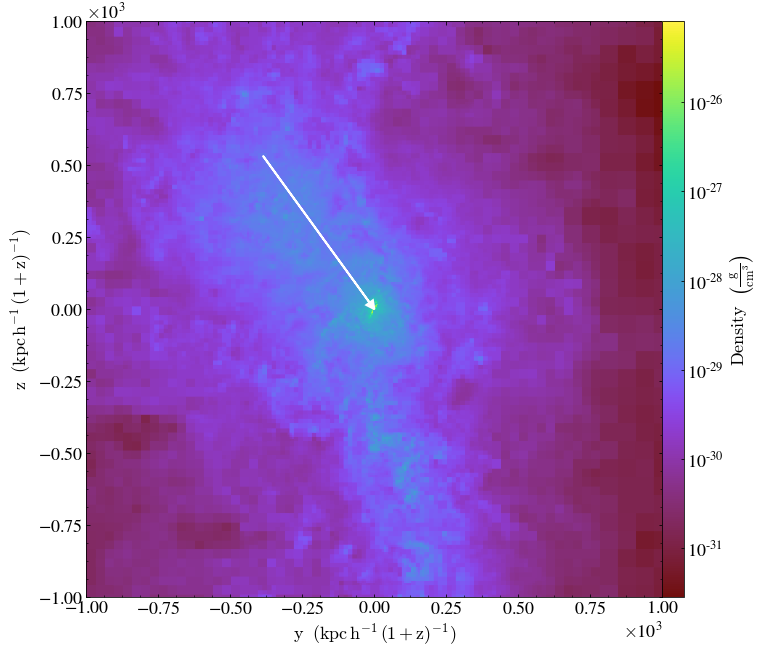

In [20]:
ray_filename = 'rays_2Mpc_LG_to_m31_and_away/ray_693.030_0.698_4.189.h5'
ray = yt.load(ray_filename)

plot_ray_in_slice(slc, ray)

slc.show()

In [5]:
ray

ray_394_0.70_4.19.h5

yt : [INFO     ] 2019-02-02 21:05:34,387 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



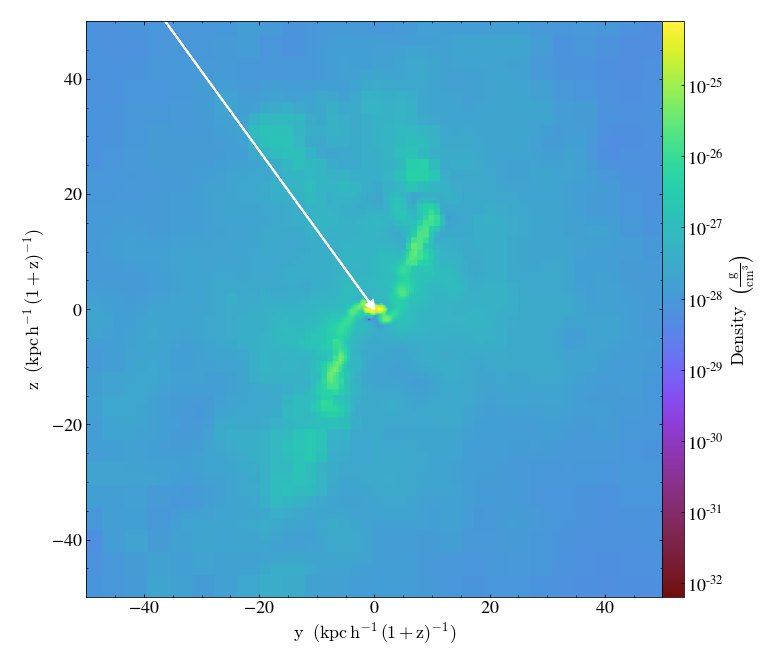

In [5]:
slc.set_width((100, 'kpccm/h'))


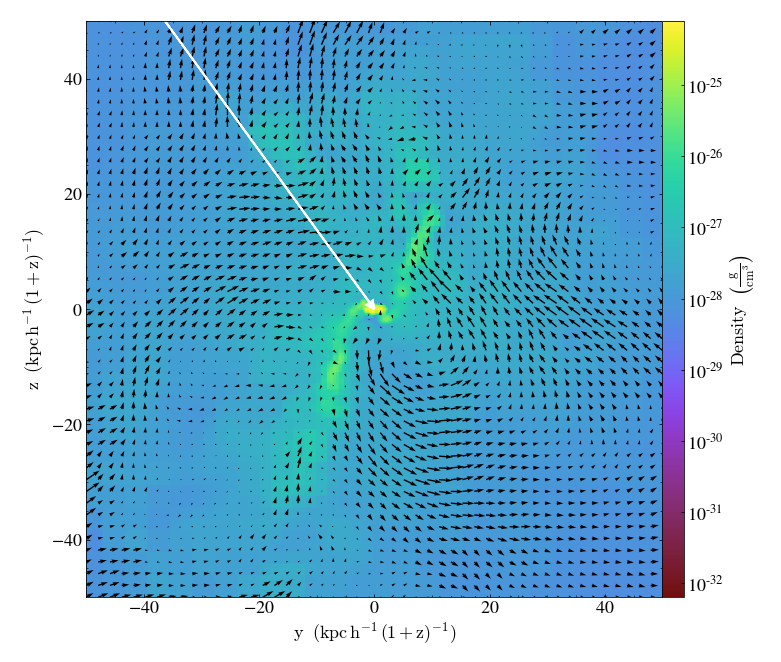

In [6]:
slc.annotate_velocity()

## Slice to M31

In [7]:
ray_toM31_filename = 'rays_2Mpc_LG_to_m31_and_away/ray_693.030_0.698_4.189.h5'
ray_m31 = yt.load(ray_toM31_filename)

yt : [INFO     ] 2019-02-02 21:05:49,174 Parameters: current_time              = 4.336488085281229e+17 s
yt : [INFO     ] 2019-02-02 21:05:49,175 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-02-02 21:05:49,175 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2019-02-02 21:05:49,176 Parameters: domain_right_edge         = [64000. 64000. 64000.] code_length
yt : [INFO     ] 2019-02-02 21:05:49,176 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-02-02 21:05:49,176 Parameters: current_redshift          = 2.220446049250313e-16
yt : [INFO     ] 2019-02-02 21:05:49,177 Parameters: omega_lambda              = 0.721
yt : [INFO     ] 2019-02-02 21:05:49,177 Parameters: omega_matter              = 0.279
yt : [INFO     ] 2019-02-02 21:05:49,177 Parameters: hubble_constant           = 0.7


In [8]:
theta, phi = ray_toM31_filename.split('_')[-2:]
index = phi.find('.h5')
phi = phi[:index]

theta_m31 = float(theta); phi_m31 = float(phi)

normal_vector_m31 = [np.sin(theta_m31)*np.sin(phi_m31), -np.sin(theta_m31)*np.cos(phi_m31), 0]
north_vector = [0,0,1]

In [14]:
normal_vector_m31

[-0.5566504263018694, 0.32122658219898675, 0]

In [12]:
slc_m31 = yt.SlicePlot(ds, normal = normal_vector_m31, fields='density', center = mw_center.tolist(), width=(2000, 'kpc'),
                   north_vector=north_vector)

yt : [INFO     ] 2019-02-02 21:06:38,375 xlim = -700.000000 700.000000
yt : [INFO     ] 2019-02-02 21:06:38,375 ylim = -700.000000 700.000000
yt : [INFO     ] 2019-02-02 21:06:38,376 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [WARNING  ] 2019-02-02 21:06:38,515 Plot image for field ('gas', 'density') has zero dynamic range. Min = Max = 0.000000.
yt : [WARNING  ] 2019-02-02 21:06:38,516 Switching to linear colorbar scaling.


In [13]:
mw_center

array([21819.64 , 32715.15 , 32897.707], dtype=float32)


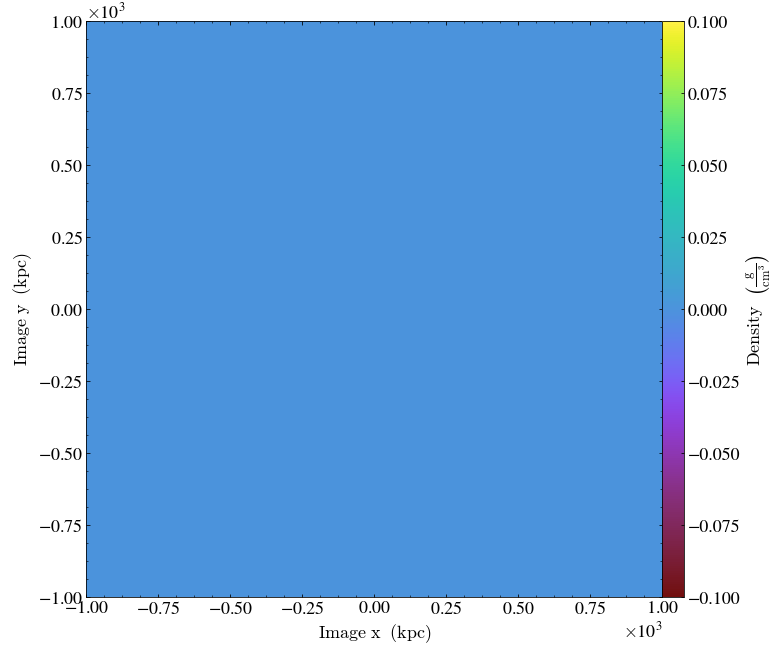

In [10]:
slc_m31.show()


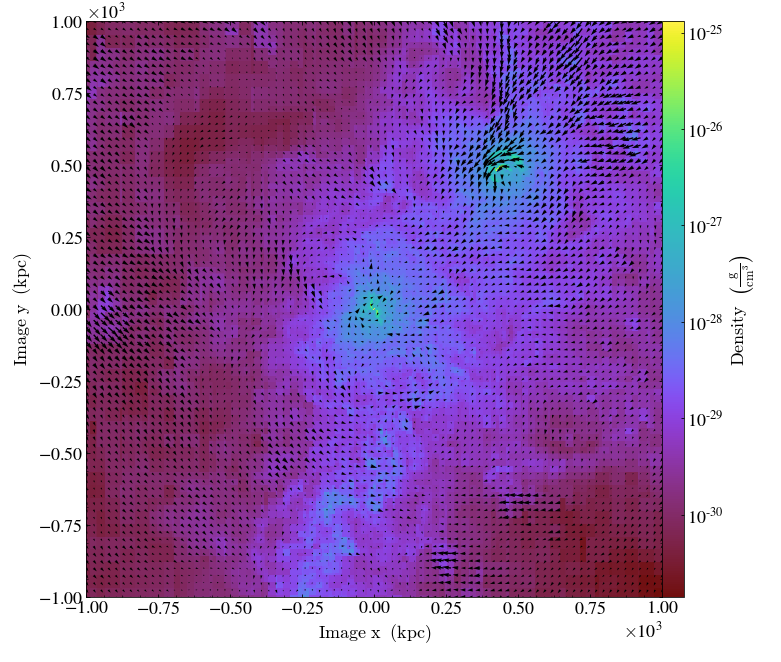

In [12]:
slc_m31.annotate_cquiver('cutting_plane_velocity_x', 'cutting_plane_velocity_y', factor =10)
slc_m31.show()


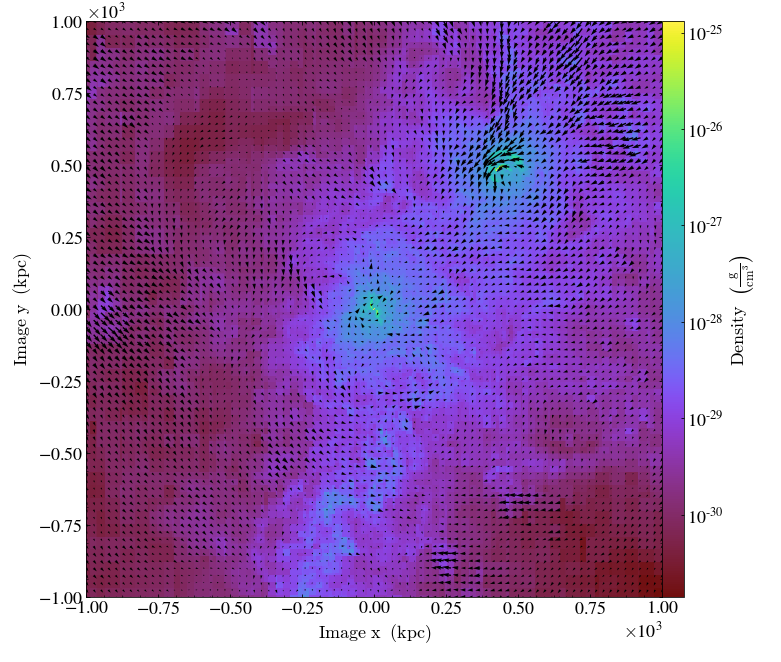

In [25]:
plot_ray_in_slice(slc_m31, ray_m31)

slc_m31.show()

## Ray away

In [15]:
ray_away_filename = 'rays_2Mpc_LG_from_mw/ray_455_1.05_1.40.h5'
ray_away = yt.load(ray_away_filename)

yt : [INFO     ] 2019-02-02 21:07:25,831 Parameters: current_time              = 4.336488085281229e+17 s
yt : [INFO     ] 2019-02-02 21:07:25,831 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-02-02 21:07:25,832 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2019-02-02 21:07:25,832 Parameters: domain_right_edge         = [64000. 64000. 64000.] code_length
yt : [INFO     ] 2019-02-02 21:07:25,833 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-02-02 21:07:25,833 Parameters: current_redshift          = 2.220446049250313e-16
yt : [INFO     ] 2019-02-02 21:07:25,833 Parameters: omega_lambda              = 0.721
yt : [INFO     ] 2019-02-02 21:07:25,833 Parameters: omega_matter              = 0.279
yt : [INFO     ] 2019-02-02 21:07:25,834 Parameters: hubble_constant           = 0.7


In [16]:
theta, phi = ray_away_filename.split('_')[-2:]
index = phi.find('.h5')
phi = phi[:index]

theta_away = float(theta); phi_away = float(phi)

normal_vector_away = [np.sin(theta_away)*np.sin(phi_away), -np.sin(theta_away)*np.cos(phi_away), 0]
north_vector = [0,0,1]

yt : [INFO     ] 2019-02-02 21:07:26,627 Allocating for 1.111e+07 particles (index particle type 'all')
yt : [INFO     ] 2019-02-02 21:07:27,646 Identified 7.123e+05 octs
yt : [INFO     ] 2019-02-02 21:07:31,877 xlim = -700.000000 700.000000
yt : [INFO     ] 2019-02-02 21:07:31,877 ylim = -700.000000 700.000000
yt : [INFO     ] 2019-02-02 21:07:31,878 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [WARNING  ] 2019-02-02 21:07:31,972 Plot image for field ('gas', 'density') has zero dynamic range. Min = Max = 0.000000.
yt : [WARNING  ] 2019-02-02 21:07:31,973 Switching to linear colorbar scaling.
/home/martin/Downloads/anaconda3/lib/python3.7/site-packages/matplotlib/quiver.py:665: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/martin/Downloads/anaconda3/lib/python3.7/site-packages/matplotlib/quiver.py:665: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu


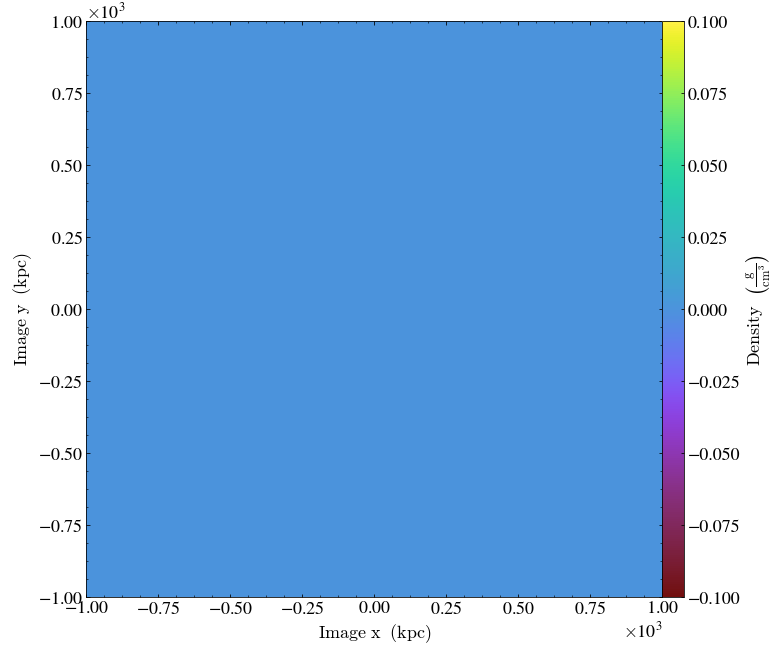

In [17]:
slc_away = yt.SlicePlot(ds, normal = normal_vector_away, fields='density', center = mw_center.tolist(), width=(2000, 'kpc'),
                   north_vector=north_vector)
slc_away.annotate_cquiver('cutting_plane_velocity_x', 'cutting_plane_velocity_y', factor =10)

plot_ray_in_slice(slc_away, ray_away)

slc_away.show()
#slc_away.save()